# (experimental) Badge Visualizations 


## Badge status 

```{warning}
this is not guaranteed to stay up to date with current, but the listed date is accurate. 
You can see the code that generates the figure behind the "click to show" button.  It is  Python code that you should be able to run anywhere with the required libraries installed. 
```

'2023-02-20'

'not today'

Text(0.5, 1.0, 'Badge Status as of 2023-02-20')

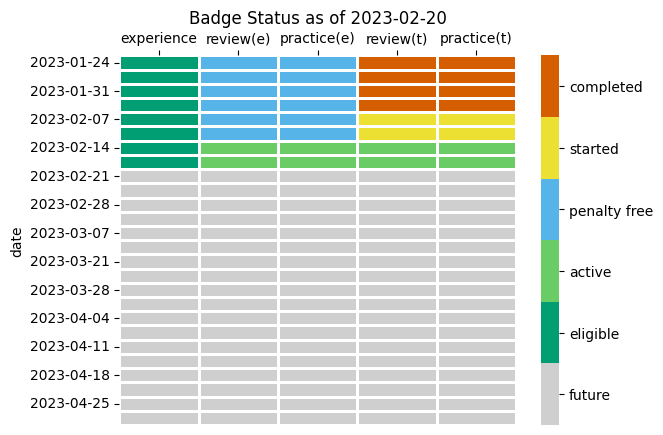

In [1]:
%matplotlib inline
import os
from datetime import date,timedelta
import calendar
import pandas as pd
import numpy as np
import seaborn as sns
from myst_nb import glue
# style note: when I wrote this code, it was not all one cell. I merged the cells
# for display on the course website, since Python is not the main outcome of this course

# semester settings
first_day = date(2023,1,24)
last_day = date(2023,5,1)
meeting_days =[1,3] # datetime has 0=Monday
spring_break = (date(2023,3,11),date(2023,3,19))
penalty_free_end = date(2023, 2, 9)


# enumerate weeks
weeks = int((last_day-first_day).days/7+1)

# create differences
mtg_delta = timedelta(meeting_days[1]-meeting_days[0])
week_delta = timedelta(7)

# function to check if a date is during spring break
during_sb = lambda d: spring_break[0]<d<spring_break[1]

# generate the number of weeks worth of dates
possible = [(first_day+week_delta*w, first_day+mtg_delta+week_delta*w) for w in range(weeks)]
# rm spring break dates
weekly_meetings = [[c1,c2] for c1,c2 in possible if not(during_sb(c1))]
#unpack into single list
meetings = [m for w in weekly_meetings for m in w]


# build a table for the dates
badge_types = ['experience', 'review', 'practice']
target_cols = ['review_target','practice_target']
df_cols = badge_types + target_cols
badge_target_df = pd.DataFrame(index=meetings, data=[['future']*len(df_cols)]*len(meetings),
                                columns=df_cols).reset_index().rename(
                                   columns={'index': 'date'})
# set relative dates
today = date.today()
start_deadline = date.today() - timedelta(7)
complete_deadline = date.today() - timedelta(14)

# mark eligible experience badges
badge_target_df['experience'][badge_target_df['date'] <= today] = 'eligible'
# mark targets, cascading from most recent to oldest to not have to check < and >
badge_target_df['review_target'][badge_target_df['date'] <= today] = 'active'
badge_target_df['practice_target'][badge_target_df['date'] <= today] = 'active'
badge_target_df['review_target'][badge_target_df['date']
                          <= start_deadline] = 'started'
badge_target_df['practice_target'][badge_target_df['date']
                            <= start_deadline] = 'started'
badge_target_df['review_target'][badge_target_df['date']
                          <= complete_deadline] = 'completed'
badge_target_df['practice_target'][badge_target_df['date']
                            <= complete_deadline] = 'completed'
# mark enforced deadlines
badge_target_df['review'][badge_target_df['date'] <= today] = 'active'
badge_target_df['practice'][badge_target_df['date'] <= today] = 'active'
badge_target_df['review'][badge_target_df['date']
                          <= start_deadline] = 'started'
badge_target_df['practice'][badge_target_df['date']
                            <= start_deadline] = 'started'
badge_target_df['review'][badge_target_df['date']
                          <= complete_deadline] = 'completed'
badge_target_df['practice'][badge_target_df['date']
                            <= complete_deadline] = 'completed'
badge_target_df['review'][badge_target_df['date']
                          <= penalty_free_end] = 'penalty free'
badge_target_df['practice'][badge_target_df['date']
                          <= penalty_free_end] = 'penalty free'

# convert to numbers and set dates as index for heatmap compatibility
status_numbers_hm = {status:i+1 for i,status in enumerate(['future','eligible','active','penalty free','started','completed'])}
badge_target_df_hm = badge_target_df.replace(status_numbers_hm).set_index('date')

# set column names to shorter ones to fit better
badge_target_df_hm = badge_target_df_hm.rename(columns={'review':'review(e)','practice':'practice(e)',
                                                       'review_target':'review(t)','practice_target':'practice(t)',})
# build a custom color bar 
n_statuses = len(status_numbers_hm.keys())
manual_palette = [sns.color_palette("pastel", 10)[7],
                 sns.color_palette("colorblind", 10)[2],
                 sns.color_palette("muted", 10)[2],
                 sns.color_palette("colorblind", 10)[9],
                 sns.color_palette("colorblind", 10)[8],
                 sns.color_palette("colorblind", 10)[3]]
# generate the figure, with the colorbar and spacing
ax = sns.heatmap(badge_target_df_hm,cmap=manual_palette,linewidths=1)
# mote titles from bottom tot op
ax.xaxis.tick_top()
# pull the colorbar object for handling
colorbar = ax.collections[0].colorbar 
# fix the location fo the labels on the colorbar
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n_statuses * (0.5 + i) for i in range(n_statuses)])
colorbar.set_ticklabels(list(status_numbers_hm.keys()))
# add a title
today_string = today.isoformat()
glue('today',today_string,display=False)
glue('today_notdisplayed',"not today",display=False)
ax.set_title('Badge Status as of '+ today_string); 

The (e) columns are what will be enforced, the (t) columns is ideal, see the [deadlines section of the syllabus for more on the statuses](rp-status) for more detail. 

The following table shows, as of  {glue:}`today`, the number of badges with each status.

In [2]:
status_list_summary = ['eligible', 'penalty free', 'active', 'started', 'completed']
badge_count_df = badge_target_df[badge_target_df['date']<today].apply(pd.value_counts).loc[status_list_summary].drop(
                    columns='date').fillna(' ')

glue('exp_ontrack',int(badge_count_df.loc['eligible','experience']),display=False)
glue('exp_min',int(badge_count_df.loc['eligible','experience']-3),display=False)
glue('rp_completed',int(badge_count_df.loc['completed','review_target']),display=False)
glue('rp_started',int(badge_count_df.loc['started','review_target']),display=False)
badge_count_df

8

5

4

2

,experience,review,practice,review_target,practice_target
eligible,8.0,,,,
penalty free,,6.0,6.0,,
active,,2.0,2.0,2.0,2.0
started,,,,2.0,2.0
completed,,,,4.0,4.0


````{margin}
```{note}
This date is formatted like this because it comes from the code
```
```{important}
Remember, there will be 26 badge opportunities, but do not need all of them.  See the [](badgecounts) section of the syllabus for how they map into letter grades
```
````


This means that, as of {glue:}`today` you are fully caught up if you have:
-  {glue:}`exp_ontrack` experience badges submitted. 
-  {glue:}`rp_completed` total review and practice badges completed.
-  {glue:}`rp_started` additional review and/or practice badges started and in progress. 


Notes: 
-  If you do not have at least {glue:}`exp_min` experience badges earned, you should visit office hours to get caught up. 
-  There are are 6 review and practice badges that are from the penalty free zone, so they never expire. 
-  Most of your experience and completed badges should be earned, but there is no deadline to fix issues with them. 


## Prepare work and Experience Badges

This is for a single example with specific dates, but it is similar for all future dates

The columns (and purple boxes) correspond to branches in your KWL repo and the yellow boxes are the things that you have to do. The "critical" box is what you hvae to wait for us on. The arrows represent PRs (or a local merge for the first one)

```{mermaid}
sequenceDiagram
    participant P as prepare Feb 7
    participant E as experience Feb 9
    participant M as main 
    note over P: complete prepare work<br/> between feb 7 and 9
    note over E: run experience badge workflow <br/> at the end of class feb 9
    P ->> E: local merge or PR you that <br/> does not need approval
    note over E: fill in experience reflection 
    critical Badge review by instructor or TA
        E ->> M: Experience badge PR
    option if edits requested
        note over E: make requested edits
    option when approved 
        note over M: merge badge PR
    end
```